# Analisando as iris

#### Importações

In [172]:
import pandas as pd
import numpy as np

#### Plotagens de dados 

In [173]:
df_titanic = pd.read_csv("Dataset/titanic.csv")

In [174]:
cols = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = pd.read_csv("Dataset\iris (1).data", header=None, names=cols)

In [175]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


3) Realize o cálculo de média, mediana, máximo, mínimo, desvio padrão para cada
atributo númerico da base de dados

In [176]:
table1 = df.describe().loc[['mean','std','min','max'],:]
table1

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000


In [177]:
sl = np.median(df.iloc[:,0])
sl

5.8

In [178]:
sw = np.median(df.iloc[:,1])
sw

3.0

In [179]:
pl = np.median(df.iloc[:,2])
pl

4.35

In [180]:
pw = np.median(df.iloc[:,3])
pw

1.3

In [181]:
median = pd.DataFrame(
{"sepal_length" : [sl],
"sepal_width" : [sw],
"petal_length" : [pl],
"petal_width" : [pw]},
index=["median"])


In [182]:
median

,sepal_length,sepal_width,petal_length,petal_width
median,5.8,3.0,4.35,1.3


In [183]:
dfc = pd.concat([table1,median])
dfc

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000
median,5.800000,3.000000,4.350000,1.300000


2) Plote os dados da base de dados escolhida em 2D.



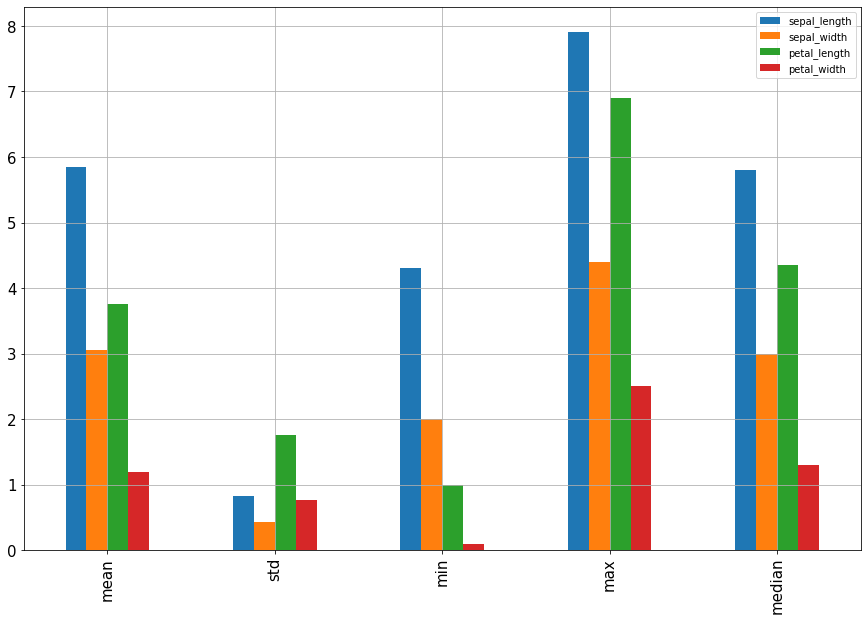

In [184]:
dfc.plot(kind="bar",figsize=(15,10), grid=True, fontsize=15);

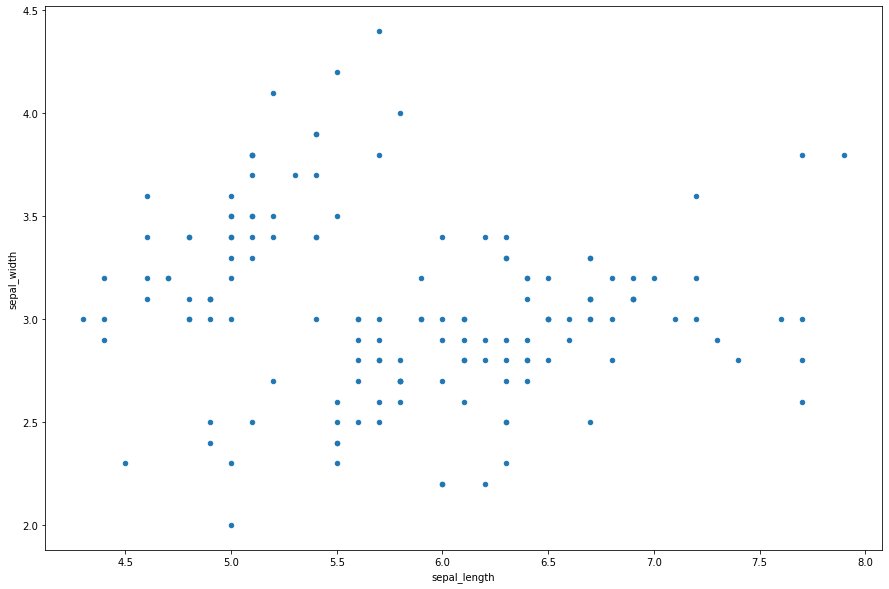

In [185]:
df.plot.scatter(x='sepal_length',y='sepal_width', figsize=(15,10));

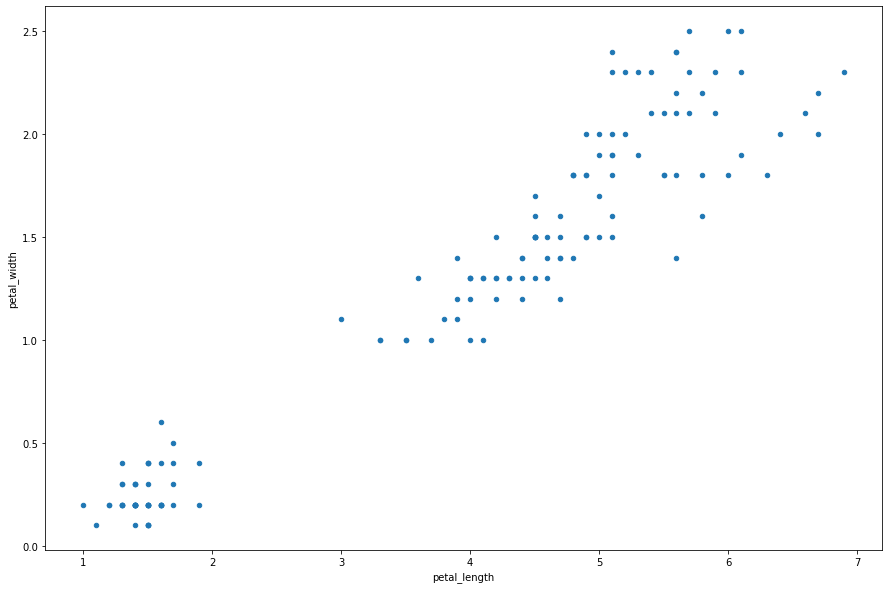

In [186]:
df.plot.scatter(x='petal_length',y='petal_width', figsize=(15,10));

4) Verifique a presença de outliers (e.g., valor maior que 3 vezes o desvio padrão da
base) da base de dados escolhida. Caso não exista, insira uma ou mais linhas para
a criação de outliers, e verifique, novamente, a presença de outliers.

5) Remova os outliers e realize o cálculo de média, mediana, moda, desvio padrão
para cada atributo númerico da base de dados.


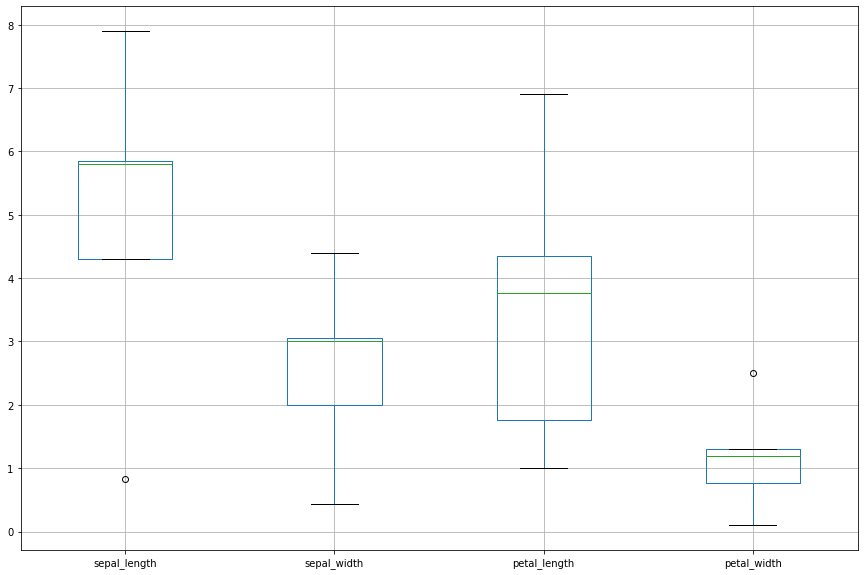

In [187]:
dfc.boxplot(figsize=(15,10));

In [188]:
#Remoção de outliers
val = dfc.iloc[:,:4]
std_all = []

for i in val:
    for j in val[i]:
        std_all.append(j)
        
std_data = np.std(std_all)*3
print(f'Desvio padrão:{std_data}')

vet_val = df.iloc[:,0:4].values.tolist()
vet_class = df.iloc[:,4].values.tolist()
print('Antes', len(vet_val),len(vet_class))

for i, v in enumerate(vet_val):
    pop = False
    for j in v:
        if j > std_data:
            pop = True
    if pop == True:
        del(vet_val[i])
        del(vet_class[i])
        pop = False
print('Depois',len(vet_val),len(vet_class))

Desvio padrão:6.666243970162908
Antes 150 150
Depois 129 129


In [191]:
df_outliers = pd.DataFrame(list(zip(vet_val,vet_class)))
df_outliers

,0,1
0,"[5.1, 3.5, 1.4, 0.2]",Iris-setosa
1,"[4.9, 3.0, 1.4, 0.2]",Iris-setosa
2,"[4.7, 3.2, 1.3, 0.2]",Iris-setosa
3,"[4.6, 3.1, 1.5, 0.2]",Iris-setosa
4,"[5.0, 3.6, 1.4, 0.2]",Iris-setosa
...,...,...
124,"[6.7, 3.3, 5.7, 2.5]",Iris-virginica
125,"[6.3, 2.5, 5.0, 1.9]",Iris-virginica
126,"[6.5, 3.0, 5.2, 2.0]",Iris-virginica
127,"[6.2, 3.4, 5.4, 2.3]",Iris-virginica


In [237]:
x = df_outliers.iloc[:,0]
col0 = []
col1 = []
col2 = []
col3 = []
for i in x:
    col0.append(i[0])
    col1.append(i[1])
    col2.append(i[2])
    col3.append(i[3])

matrix = pd.DataFrame([col0,col1,col2,col3])
matrix.transpose()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
124,6.7,3.3,5.7,2.5
125,6.3,2.5,5.0,1.9
126,6.5,3.0,5.2,2.0
127,6.2,3.4,5.4,2.3


7) Carregue uma nova base de dados que possua atributos categóricos, faça um
merge de dois dataframes (um para cada base de dados), e crie uma nova coluna
para indicar a que dataframe/base de dados pertence cada linha.

In [ ]:
#dividindo e juntando o dataset
half = len(df_titanic)//2
df_titanic1 = df_titanic.iloc[:half,:]
df_titanic1 = df_titanic1.assign(Part = [1 for x in range(0,len(df_titanic1))])
df_titanic2 = df_titanic.iloc[half:,:]
df_titanic2 = df_titanic2.assign(Part = [2 for x in range(0,len(df_titanic2))])

df_titanic_concat = pd.concat((df_titanic1,df_titanic2), axis=0)
df_titanic_concat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Part
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0,2
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0,2
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0,2
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0,2


8) Caso a nova base de dados seja ‘titanic’: selecione e mostre a quantidade de
passageiros do titanic que possuem mais de 27 anos e que sobreviveram ao
acidente.


In [ ]:
df_query = df_titanic_concat.query('Age > 27 and Survived == 1 ')
df_query

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Part
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,1
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,...,35.0,"Bonnell, Miss Elizabeth",61.0,"Youngstown, Ohio, US",Southampton,"Youngstown, Ohio, US",8,NaN,1.0,1
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,...,446.0,"Hewlett, Mrs. Mary Dunbar (née Kingcome)",56.0,"Lucknow, British India, UK[note 3]",Southampton,"Rapid City, South Dakota, US",13,NaN,2.0,1
21,22,1.0,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,...,346.0,"Beesley, Mr. Lawrence",34.0,"London, England, UK",Southampton,"Toronto, Ontario, Canada",13,NaN,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1.0,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,...,290.0,"Swift, Mrs. Margaret Welles (née Barron)",46.0,"New York, New York, US",Southampton,"New York, New York, US",8,NaN,1.0,2
865,866,1.0,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,...,363.0,"Byström, Miss Karolina",42.0,New York City,Southampton,New York City,?,NaN,2.0,2
871,872,1.0,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,...,27.0,"Beckwith, Mrs. Sallie (née Monypeny)",46.0,"New York, New York, US",Southampton,"New York, New York, US",5,NaN,1.0,2
874,875,1.0,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,...,328.0,"Abelson, Mrs. Anna (née Wizosky?)",28.0,Russia,Cherbourg,"New York, New York, US",10,NaN,2.0,2


Caso a nova base de dados seja ‘titanic’: transforme os dados contínuos de idade do
titanic em dados categóricos de acordo com uma regra. Sugestão de regra:
a) 0 a 18 anos: criança
b) 18 a 60 anos: adulto
c) maior que 60: idoso

In [ ]:
df_titanic_values = df_titanic_concat.values.tolist()
for i, v in enumerate(df_titanic_values):
    if v[5] <= 2:
        df_titanic_values[i][5] = "Bebê"
    elif v[5] > 2 and v[5] <= 12:
        df_titanic_values[i][5] = "Criança"
    elif v[5] > 12 and v[5] <= 18:
        df_titanic_values[i][5] = "Jovem"
    elif v[5] > 18 and v[5] <= 65:
        df_titanic_values[i][5] = "Adulto"
    elif v[5] > 65:
        df_titanic_values[i][5] = "Idoso"

In [ ]:
df = pd.DataFrame(df_titanic_values, columns=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','WikiId','Name_wiki','Age_wiki','Hometown','Boarded','Destination','Lifeboat','Body','Class','Part'])           
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Part
0,1,0.0,3,"Braund, Mr. Owen Harris",male,Adulto,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adulto,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,Adulto,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adulto,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,Adulto,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0,2
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,Adulto,0,0,PC 17758,108.9000,...,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0,2
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,Adulto,0,0,SOTON/O.Q. 3101262,7.2500,...,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0,2
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0,2
